In [16]:
from langgraph.graph import StateGraph,START,END
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
from langgraph.checkpoint.memory import InMemorySaver
from typing import TypedDict

In [17]:

llm = ChatOpenAI()


In [18]:
class states(TypedDict):
    name: str
    sport:str
    info:str


In [19]:
def sport(state:states):
    prompt = f'Give the name of the sports this person plays : {state['name']}'
    sports = llm.invoke(prompt).content
    return {'sport': sports}

In [20]:
def info(state:states):
    prompt = f'Give jokes about this sport: {state['sport']}'
    infos = llm.invoke(prompt).content
    return {'info': infos}

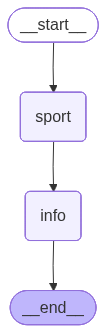

In [21]:
graph = StateGraph(states)

graph.add_node('sport',sport)
graph.add_node('info',info)

graph.add_edge(START,'sport')
graph.add_edge('sport','info')
graph.add_edge('info',END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkpointer)
workflow

In [22]:
config1 = {'configurable':{'thread_id':'1'}}
workflow.invoke({'name':'Dhoni'},config=config1)

{'name': 'Dhoni',
 'sport': 'Cricket',
 'info': "1. Why did the cricket team go to the beach? They heard they could find a good pitch there!\n\n2. Why did the cricket player go to jail? Because he was caught in a sticky wicket!\n\n3. Why do cricketers make terrible comedians? Because they're always getting caught out for a duck!\n\n4. Why don't cricketers like math? Because they can't handle the bowl-ing!\n\n5. Why was the cricket team so good at baking? Because they knew how to handle the bouncers!"}

In [23]:
config2 = {'configurable':{'thread_id':'2'}}
workflow.invoke({'name':'Ronaldo'},config=config2)

{'name': 'Ronaldo',
 'sport': 'Soccer (Football)',
 'info': '1. Why was the soccer player such a good detective? Because he always knew how to follow the clues! \n2. What do you call a chicken playing soccer? Poultry in motion! \n3. Why did the soccer player bring string to the game? So he could tie the score! \n4. What did the soccer ball say to the player? "I\'ve got some bounce in my step!" \n5. Why was the soccer stadium so cold? Because there were too many fans!'}

In [24]:
workflow.get_state(config1)

StateSnapshot(values={'name': 'Dhoni', 'sport': 'Cricket', 'info': "1. Why did the cricket team go to the beach? They heard they could find a good pitch there!\n\n2. Why did the cricket player go to jail? Because he was caught in a sticky wicket!\n\n3. Why do cricketers make terrible comedians? Because they're always getting caught out for a duck!\n\n4. Why don't cricketers like math? Because they can't handle the bowl-ing!\n\n5. Why was the cricket team so good at baking? Because they knew how to handle the bouncers!"}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0f7c16-287d-6785-8002-3a17918d3563'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-01-22T18:37:20.230359+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0f7c16-14e3-6c00-8001-243cf1854a69'}}, tasks=(), interrupts=())

In [25]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'name': 'Dhoni', 'sport': 'Cricket', 'info': "1. Why did the cricket team go to the beach? They heard they could find a good pitch there!\n\n2. Why did the cricket player go to jail? Because he was caught in a sticky wicket!\n\n3. Why do cricketers make terrible comedians? Because they're always getting caught out for a duck!\n\n4. Why don't cricketers like math? Because they can't handle the bowl-ing!\n\n5. Why was the cricket team so good at baking? Because they knew how to handle the bouncers!"}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0f7c16-287d-6785-8002-3a17918d3563'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-01-22T18:37:20.230359+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0f7c16-14e3-6c00-8001-243cf1854a69'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'name': 'Dhoni', 'sport': 'Cricket'}, next=('info',), confi

# Time Travel

(FOR DEBUGGING) 

In [31]:
workflow.get_state({'configurable':{'thread_id':'1','checkpoint_id': '1f0f7c16-14e3-6c00-8001-243cf1854a69'}})

StateSnapshot(values={'name': 'Dhoni', 'sport': 'Cricket'}, next=('info',), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f0f7c16-14e3-6c00-8001-243cf1854a69'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2026-01-22T18:37:18.175099+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0f7c16-07e7-636a-8000-bdef02fce987'}}, tasks=(PregelTask(id='c009c5fd-0701-45fd-77f9-63567c12506c', name='info', path=('__pregel_pull', 'info'), error=None, interrupts=(), state=None, result={'info': "1. Why did the cricket team go to the beach? They heard they could find a good pitch there!\n\n2. Why did the cricket player go to jail? Because he was caught in a sticky wicket!\n\n3. Why do cricketers make terrible comedians? Because they're always getting caught out for a duck!\n\n4. Why don't cricketers like math? Because they can't handle the bowl-ing!\n\n5. Why was the cricket team so good at baking? Because they knew 

In [ ]:
workflow.invoke(None, {"configurable": {"thread_id": "1", "checkpoint_id": '1f0f7c16-14e3-6c00-8001-243cf1854a69'}})

{'name': 'Dhoni',
 'sport': 'Cricket',
 'info': "1. Why do cricketers not make good comedians? Because they only know how to bowl jokes.\n\n2. Why did the cricket team go to the library? Because they wanted to improve their bowling knowledge.\n\n3. Why don't cricketers get lost while playing? Because they always follow the 'run' way.\n\n4. What do you call a cricket player who's always in a rush? A run thief.\n\n5. Why was the cricket team so good at baking? Because they always had a good delivery.\n\n6. What do you call a cricket match where the batsman keeps hitting the ball straight to the fielder? An easy catch.\n\n7. Why did the cricket ball go to school? It wanted to become a bowler.\n\n8. Why do cricketers make terrible umpires? Because they can't handle the pressure of being out.\n\n9. Why did the cricket coach go to the bank? To improve his balance.\n\n10. What do you call a cricket player who can't stop eating snacks during the game? A wicket keeper."}

In [34]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'name': 'Dhoni', 'sport': 'Cricket', 'info': "1. Why do cricketers not make good comedians? Because they only know how to bowl jokes.\n\n2. Why did the cricket team go to the library? Because they wanted to improve their bowling knowledge.\n\n3. Why don't cricketers get lost while playing? Because they always follow the 'run' way.\n\n4. What do you call a cricket player who's always in a rush? A run thief.\n\n5. Why was the cricket team so good at baking? Because they always had a good delivery.\n\n6. What do you call a cricket match where the batsman keeps hitting the ball straight to the fielder? An easy catch.\n\n7. Why did the cricket ball go to school? It wanted to become a bowler.\n\n8. Why do cricketers make terrible umpires? Because they can't handle the pressure of being out.\n\n9. Why did the cricket coach go to the bank? To improve his balance.\n\n10. What do you call a cricket player who can't stop eating snacks during the game? A wicket keeper."}, ne

# Updating state

In [38]:
workflow.update_state({"configurable": {"thread_id": "1", 'checkpoint_id': '1f0f7c16-07e7-636a-8000-bdef02fce987', "checkpoint_ns": ""}}, {'name':'Lebron James'})

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0f7c2c-67a5-69b7-8001-58b4c3ca80a2'}}

In [40]:
workflow.invoke(None, {"configurable": {"thread_id": "1", 'checkpoint_id': '1f0f7c2c-67a5-69b7-8001-58b4c3ca80a2'}})


{'name': 'Lebron James',
 'sport': 'Basketball',
 'info': "1. Why was the basketball court so wet? Because the players kept dribbling all over it!\n\n2. Why couldn't the bicycle stand up on its own? Because it was two tired from playing basketball!\n\n3. What does a basketball player do when he loses his shoe? He looks for his soul!\n\n4. Why do basketball players love cookies? Because they can dunk them!\n\n5. Why did the basketball player go to jail? Because he shot the ball!"}

In [41]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'name': 'Lebron James', 'sport': 'Basketball', 'info': "1. Why was the basketball court so wet? Because the players kept dribbling all over it!\n\n2. Why couldn't the bicycle stand up on its own? Because it was two tired from playing basketball!\n\n3. What does a basketball player do when he loses his shoe? He looks for his soul!\n\n4. Why do basketball players love cookies? Because they can dunk them!\n\n5. Why did the basketball player go to jail? Because he shot the ball!"}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0f7c33-20c2-6f7d-8003-6bc9646f303f'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2026-01-22T18:50:17.882782+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0f7c33-14e7-61e0-8002-09389ca89711'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'name': 'Lebron James', 'sport': 'Basketball'}, next=('info',), config={'configur

# Fault Tolerance

In [42]:
from langgraph.graph import StateGraph, END
from langgraph.checkpoint.memory import InMemorySaver
from typing import TypedDict
import time

In [43]:

# 1. Define the state
class CrashState(TypedDict):
    input: str
    step1: str
    step2: str

In [ ]:
# 2. Define steps
def step_1(state: CrashState) -> CrashState:
    print("✅ Step 1 executed")
    return {"step1": "done", "input": state["input"]}

def step_2(state: CrashState) -> CrashState:
    print("⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)")
    time.sleep(100)  # Simulate long-running hang
    return {"step2": "done"}

def step_3(state: CrashState) -> CrashState:
    print("✅ Step 3 executed")
    return {"done": True}

In [45]:

# 3. Build the graph
builder = StateGraph(CrashState)
builder.add_node("step_1", step_1)
builder.add_node("step_2", step_2)
builder.add_node("step_3", step_3)

builder.set_entry_point("step_1")
builder.add_edge("step_1", "step_2")
builder.add_edge("step_2", "step_3")
builder.add_edge("step_3", END)

checkpointer = InMemorySaver()
graph = builder.compile(checkpointer=checkpointer)

In [ ]:

# 6. Re-run to show fault-tolerant resume
print("\n🔁 Re-running the graph to demonstrate fault tolerance...")
final_state = graph.invoke(None, config={"configurable": {"thread_id": 'thread-1'}})
print("\n✅ Final State:", final_state)

In [ ]:
list(graph.get_state_history({"configurable": {"thread_id": 'thread-1'}}))








































